## Who owns corporate America
`You are going to work with some data that we used to show that passive investors own corporate America`

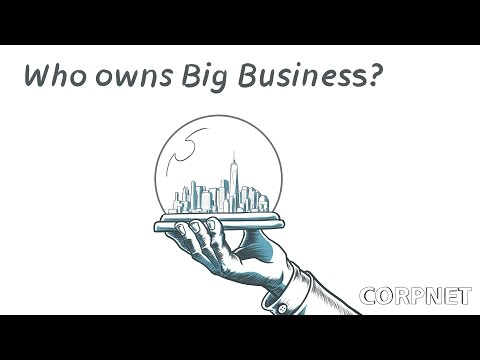

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('OYpCxXuF3M8')

`I modified a bit the data, changing encodings, adding several variables in the same column and splitting it into several datasets. You'll need to fix it`
- `The first one (company_data.csv) has information on the company name, the company ID, the percentage of ownership of the Big 3 passive investors (Big3Share), their rank as shareholders (position, 1 = largest shareholder) and some financials.`
- `The second one (employees.csv) has information on the company ID and the number of employees`

`You'll replicate some figures from the paper, and will create some new one`

In [2]:
#Imports needed
import pandas as pd
import pylab as plt
import seaborn as sns
import numpy as np


%matplotlib inline

## 1. Read file "data/company_data.csv" (beware the encoding) and print header

In [ ]:
df = pd.read_csv(......)
df.head()

## 2. Describe the dataset, print the dtypes and fix the problem with the dollar symbol

In [1]:
#Use df.describe() to see how it looks like. Why is dollars_th not there? (describe only describes numeric columns)


In [2]:
#Print dtypes (object == strings)


In [ ]:
#Use df["Dollars_th"].str.slice() to delete the first character
df["Dollars_th"] = df["Dollars_th"].str.slice(......)

#Convert to type float
df["Dollars_th"] = df["Dollars_th"].astype(...)

## 3. Tidy the table (pivot or melt)

In [ ]:
##Pivot or Melt to tidy format

...



df_fixed.head()

## 4. Read the dataset data/employees.csv and merge with the ohter

In [ ]:
#Read the other dataset
df_emp = pd.read_csv("data/employees.csv",sep="\t")
df_emp.head()

In [ ]:
#Merge the datafiles
df_merged = ...
df_merged.head()

## 5. Replicate figures similar to the ones in the paper
- The variable "Position" ranks the position of the Big3 among the investors of the company. Use pd.cut to create four categories: Big3 as largest shareholder (position 1). Big3 as second largest shareholder (position 2). Big3 as third largest shareholder (position 3). Big3 not one of the third largest shareholder (position 4 to end)
- Plot the average ownership by category
- Plot the sum of market capitalization by category
- Plot the normalized sum of market capitalization by category

Control the aesthetics of the plot, make the figure of a nice size, delete the edges of the bars and despine the figure (sns.despine())

In [10]:
#Create the variable described above
df_merged["Cat_Big3"] = pd.cut(.....)

In [ ]:
#Plot the average onwership (Big3Share) for each of the 4 categories (barplot, boxplot or violinplot). 
#Use the same color for all bars and fix the labels

#Make the plot of a nice size
plt.figure(figsize=(.....))

#Make the plot
....

#Add some labels
plt.xlabel(....)
plt.ylabel(....)

#Despine
sns.despine()

In [ ]:
#Plot the sum of market capitalization (MarketCap) for each of the 4 categories (barplot).
#To plot the sum instead of the average you need to use the option ",estimator=sum" in the barplot
#Use the same color for all bars and fix the labels

.....

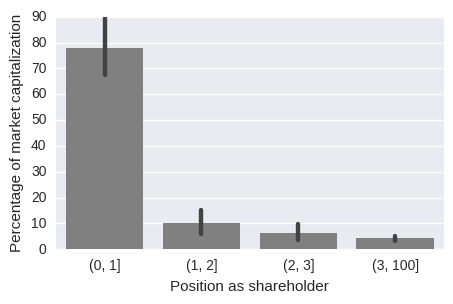

In [13]:
#Create a variable with the normalized market capitalization that sums up to 100
#Make sure you understand this line.
df_merged["MarketCap_Sum100"] = 100*df_merged["MarketCap"]/np.sum(df_merged["MarketCap"])

#Redo the plot
....

## 6. Transform financials into log scale and plot distributions

In [14]:
#Transform financial variables to log
df_merged["log_Employees"] = ...
df_merged["log_Revenue"] = ...
df_merged["log_Assets"] = ...
df_merged["log_MarketCap"] = ...

#Delete infinite values (they occur when you take the logarithm of zero) and drop missing values in any row
#Make sure you understand this line too
df_merged = df_merged.replace([np.inf,-np.inf],np.nan)
df_merged = df_merged.dropna()

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


In [ ]:
#Make histograms (sns.distplot) for all variables. 
#Try both hist=True (default) and hist=False to see the difference
plt.figure(figsize=(6,3)
sns.distplot(......,label='emp')
sns.distplot(......,label="rev")
sns.distplot(......,label="assets")
sns.distplot(......,label="mark")
plt.legend()

## 7. Make some plots to visualize how assets, market capitalization and employees correlate for different types of companies



In [ ]:
#Make a scatter plot (lmplot) of x = assets and y = market capitalization with hue = TypeEnt
#It'll be too cluttered
.....

## Keep a subset of the data with banks and industrial companies and do the plot again
- This time change labels
- Make white background (controlling aesthetics): http://seaborn.pydata.org/tutorial/aesthetics.html
- Use the argument aspect to make the plot look a little bit more wider
- Use xlim and ylim
- Make the dots a bit smaller and a bit transparent
- Save the ifugre (pdf)

In [ ]:
#Keep a subset of the data with banks and industrial companies
df_bank_industr = df_merged.loc[.......]
df_bank_industr.head()

In [ ]:
#Set the background to white with sns.set_style (see http://seaborn.pydata.org/tutorial/aesthetics.html)
......


In [ ]:
#Make a scatter plot of x = assets and y = market capitalization with hue = Type of ent
sns.lmplot(.... , #add the normal stuff
           size=3,.... #add the aspect
           scatter_kws= #make the dots a bit smaller and a bit transparent (see the exercise with dinosaur)
          )

#make labels (plt.xlabel...)

#Change limits (plt.xlim...)

## Use the same subset of companies to plot log of assets versus log of market capitalization

In [ ]:
#Make a scatter plot of x = assets and y = market capitalization with hue = Type of ent
....